In [1]:
import pandas as pd

data = pd.read_csv("Iris.csv")

In [2]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data = data[["PetalLengthCm", "PetalWidthCm", "Species"]]

In [5]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [7]:
def convert(x):
    values = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
    return values.index(x)

data["Species"] = data["Species"].apply(convert)

In [8]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [9]:
data = data[data["Species"] < 2]

In [10]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [11]:
len(data)

100

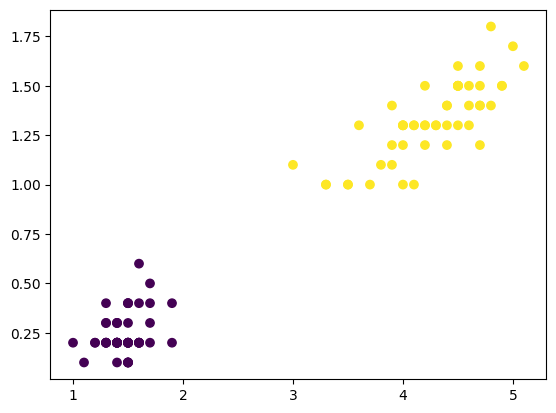

In [17]:
import matplotlib.pyplot as plt

plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"], c = data["Species"])

In [18]:
# Shuffle the Dataset
data = data.sample(frac = 1)

In [19]:
data.head()

,PetalLengthCm,PetalWidthCm,Species
90,4.4,1.2,1
8,1.4,0.2,0
63,4.7,1.4,1
51,4.5,1.5,1
84,4.5,1.5,1


In [26]:
np_data = data.to_numpy()

In [30]:
size = len(np_data)
fraction = 0.7
train_data = np_data[:int(fraction*size)]
test_data = np_data[int(fraction*size):]

In [32]:
np_data.shape, train_data.shape, test_data.shape

((100, 3), (70, 3), (30, 3))

In [35]:
def threshold(x):
    return x > 0.5

def perceptron(weights, data, learning_rate, num_epochs, act, bias=0):
    input_size = len(weights)
    if num_epochs == -1:
        num_epochs = 1000
    for epoch in range(num_epochs):
        done = True
        for d in data:
            output = bias
            for weight, input in zip(weights, d[:input_size]):
                output += weight * input
            output = act(output)
            # print(output)
            if d[-1] - output:
                for i in range(len(weights)):
                    # print(learning_rate, (d[-1]-output), input)
                    weight = weights[i]
                    input = d[i]
                    weight += learning_rate * (d[-1] - output) * input
                    weights[i] = weight
                bias += learning_rate * (d[-1] - output)
                done = False
                break
        if done:
            print(f"Done after {epoch} epochs")
            return weights, bias 
        
    print(f"Done after {epoch} epochs")
    return weights, bias


def forward(weights, data, act, bias):
    input_size = len(weights)
    output = 0
    for weight, input in zip(weights, data[:input_size]):
        output += weight * input
    output += bias
    output = act(output)
    return output


init_weights = [0, 0]
learning_rate = 0.2
num_epochs = -1
init_bias = 0
print(
    f"Running Training...\nHyperparameters:\nInitial Weights:{init_weights}\nLearning Rate:{learning_rate}\nBias:{init_bias}"
)
weights, bias = perceptron(
    init_weights, train_data, learning_rate, num_epochs, threshold, init_bias
)
print(f"\nFinal Weights:{weights}\nFinal Bias:{bias}")
print("\nRunning Testing...")
acc = 0
for d in test_data:
    pred = forward(weights, d, threshold, bias)
    acc += (pred == d[-1])
print(
    f"Accuracy: {acc/len(test_data)}"
)

Running Training...
Hyperparameters:
Initial Weights:[0, 0]
Learning Rate:0.2
Bias:0
Done after 3 epochs

Final Weights:[0.3200000000000001, 0.15999999999999998]
Final Bias:-0.2

Running Testing...
Accuracy: 1.0


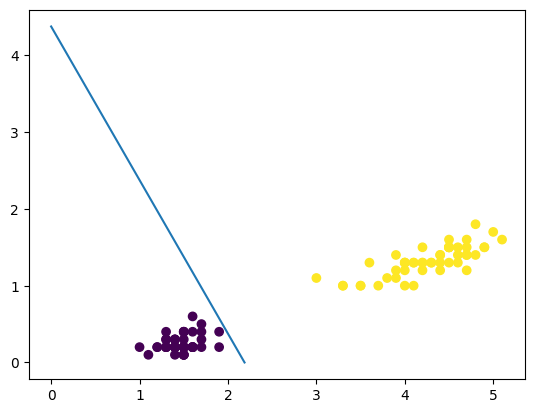

In [36]:
# Plot weights[0]*d[0] + weights[1]*d[1] + bias = threshold
plt.plot([0, (0.5 - bias)/weights[0]], [(0.5 - bias)/weights[1], 0])
plt.scatter(data["PetalLengthCm"], data["PetalWidthCm"], c = data["Species"])